# FAA Project - Data Exploration

In [1]:
# installing icd10-cm package to deal with icd-10-cm dianostic codes
# import sys
# !{sys.executable} -m pip install icd10-cm

## Importing libraries

In [2]:
# load libaries
import pandas as pd                  # for dataframe
import numpy as np                   # for dealing with numpy
import matplotlib.pyplot as plt      # for plots
import seaborn as sns                # for statistical data visualization
import icd10                         # for getting info of ICD-10-CM diagnosis codes

# a magic function that renders the figure in a notebook 
%matplotlib Inline

# allow to display all columns of dataframe
pd.set_option('display.max_columns', None)

# Import Data

## Checking components of ccaei table

In [3]:
# just reading first few rows to check the components for now 
df = pd.read_csv('ccaei192_a.csv.gz',compression = 'gzip',nrows = 15)
df.head(10)

,SEQNUM,VERSION,EFAMID,ENROLID,DOBYR,YEAR,ADMDATE,AGE,CASEID,DAYS,DISDATE,DRG,DXVER,HOSPNET,HOSPPAY,MHSACOVG,PDX,PHYSID,PHYSNET,PHYSPAY,PLANTYP,PPROC,TOTCOB,TOTCOINS,TOTCOPAY,TOTDED,TOTNET,TOTPAY,ADMTYP,MDC,DSTATUS,REGION,MSA,DATATYP,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,PROC1,PROC2,PROC3,PROC4,PROC5,PROC6,PROC7,PROC8,PROC9,PROC10,PROC11,PROC12,PROC13,PROC14,PROC15,AGEGRP,EECLASS,EESTATU,EGEOLOC,EIDFLAG,EMPREL,ENRFLAG,PHYFLAG,RX,SEX,STATE,HLTHPLAN,INDSTRY,POAPDX,POADX1,POADX2,POADX3,POADX4,POADX5,POADX6,POADX7,POADX8,POADX9,POADX10,POADX11,POADX12,POADX13,POADX14,POADX15
0,486672,20,13113146,NaN,1992.0,2019,01/01/2019,26.0,486672,6,01/07/2019,788,0,0.00,NaN,1.0,O26893,NaN,0.00,NaN,8,10D00Z1,NaN,NaN,NaN,NaN,0.00,NaN,3,14,1.0,3,19124.0,1,O26893,O619,Z370,Z3A39,O622,O7581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10D00Z1,10907ZC,3E0P7VZ,59510.0,59514.0,59515.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4,1,49,3,3,1,1,1,NaN,49,0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500906,20,37007530,NaN,NaN,2019,01/01/2019,NaN,500906,1,01/02/2019,795,0,1787.50,NaN,1.0,Z3800,NaN,0.00,NaN,6,NaN,NaN,NaN,NaN,NaN,1787.50,NaN,3,15,1.0,5,NaN,1,Z3800,P599,Q828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,3,4,1,1,1,NaN,33,0,6.0,1,1,Y,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,501015,20,45794789,NaN,NaN,2019,01/01/2019,NaN,501015,1,01/01/2019,789,0,2034.77,NaN,1.0,Z3830,NaN,0.00,NaN,6,NaN,NaN,NaN,NaN,NaN,2034.77,NaN,3,15,NaN,5,NaN,1,Z3830,P0278,P0716,P0721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1,1,3,4,1,1,1,NaN,11,0,6.0,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,501623,20,34417497,NaN,1995.0,2019,01/01/2019,24.0,501623,10,01/11/2019,885,0,2954.60,NaN,1.0,F200,NaN,782.88,NaN,9,NaN,NaN,NaN,NaN,NaN,3911.98,NaN,4,19,1.0,5,NaN,1,F200,E781,F1210,R45850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99223,99233,99239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,1,1,3,3,1,1,1,NaN,49,0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,602268,20,15881404,NaN,1976.0,2019,01/01/2019,43.0,602268,3,01/04/2019,392,0,10915.78,NaN,1.0,R1013,NaN,606.67,NaN,6,NaN,NaN,NaN,NaN,NaN,12032.55,NaN,2,6,1.0,2,0.0,1,R1013,E8020,N3000,Z6842,Z885,R109,I10,F17200,K760,R112,R740,Z9049,R8290,NaN,NaN,NaN,99221,99222,99232.0,99233.0,99239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,8,1,19,3,4,1,1,1,2.0,19,0,NaN,Y,Y,Y,Y,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,810844,20,34099217,NaN,NaN,2019,01/01/2019,NaN,810844,2,01/03/2019,794,0,11772.07,NaN,NaN,Z3800,NaN,0.00,NaN,6,NaN,NaN,NaN,NaN,NaN,11772.07,NaN,3,15,1.0,5,NaN,1,Z3800,P700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1,1,3,4,1,1,1,NaN,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,810846,20,31436672,NaN,NaN,2019,01/01/2019,NaN,810846,2,01/03/2019,794,0,4453.17,NaN,NaN,Z3800,NaN,0.00,NaN,6,0VTTXZZ,NaN,NaN,NaN,NaN,4496.92,NaN,3,15,1.0,5,NaN,1,Z3800,Q381,N2889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0VTTXZZ,F13Z0ZZ,76770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,4,1,3,4,1,1,1,NaN,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,810871,20,31723271,NaN,NaN,2019,01/01/2019,NaN,810871,2,01/03/2019,795,0,4610.91,NaN,NaN,Z3800,NaN,0.00,NaN,6,0VTTXZZ,NaN,NaN,NaN,NaN,4653.91,NaN,3,15,1.0,5,NaN,1,Z3800,Z23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0VTTXZZ,99462,99239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1,1,3,4,1,1,1,NaN,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,810924,20,31489255,NaN,NaN,2019,01/01/2019,NaN,810924,3,01/04/2019,795,0,2414.28,NaN,NaN,Z3801,NaN,0.00,NaN,6,6A601ZZ,NaN,NaN,NaN,NaN,2414.28,NaN,3,15,1.0,5,NaN,1,Z3801,P599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6A601ZZ,0VTTX

In [4]:
#delete df to free up memory 
del df

### Load in 2019 Inpatient Admission Data

'''
Load in full-data first, then sample from it later,
The full data should then be dropped from the memory.

'''

In [124]:
# FULL-DATA
# specify which column to read, so that the unneccessay column don't take up memory
columns = ['ENROLID','YEAR', 'AGE', 'DX1', 'DX2', 
           'DX3', 'DX4', 'DX5', 'DX6', 'DX7', 
           'DX8', 'DX9', 'DX10', 'DX11', 'DX12', 
           'DX13', 'DX14', 'DX15','SEX']


ccaei192_a = pd.read_csv('ccaei192_a.csv.gz',compression = 'gzip', 
                 skiprows = range(1, 3855),  # skiprows = 3855, before that all Enrolid is NaN
                 usecols = columns)

ccaei192_a.head()

,ENROLID,YEAR,AGE,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX
0,286902,2019,65,I214,E039,E785,G43909,I10,Z7982,Z79899,Z87891,R079,E876,R0602,NaN,NaN,NaN,NaN,2
1,571103,2019,57,J189,G8250,M8580,N3091,R130,S14109S,Z905,N400,R918,K8020,R05,N3090,R319,R4701,R9341,1
2,571103,2019,57,J690,B952,G8250,J9601,J9811,K921,N390,R1310,T17890A,J189,R000,R0602,J988,M8580,R9389,1
3,593902,2019,52,E10649,I10,K2950,K2980,K311,K315,N390,Q909,Z794,E11649,E162,R109,K838,NaN,NaN,2
4,1038502,2019,64,G5632,F419,G629,I10,I160,I4510,M21332,Z981,G609,I63233,R202,R531,I639,M6281,M2020,2


In [125]:
ccaei192_a.shape

(1133288, 19)

'''
no of rows in 2019 dataset are 1133288

'''

### Load in 2020 Inpatient Admission Dataset

In [126]:
ccaei200_a = pd.read_csv('ccaei200_a.csv.gz',compression = 'gzip', 
                         skiprows = range(1, 3458),  # skip the missing Enrolid
                         usecols = columns)

ccaei200_a.head()

,ENROLID,YEAR,AGE,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX
0,371401,2020,59,A4102,E870,I2699,J189,M6282,N170,Q256,R6521,Z6841,D649,R1011,M25422,M25522,R011,R509,1
1,571103,2020,58,D500,G8250,I129,K222,K635,N189,Z87820,Z931,D649,K225,D509,Z431,R1310,R231,D126,1
2,1092607,2020,55,S72145A,E039,F17210,I10,I2510,M5030,R636,Z681,S72142A,S72002A,Z01818,D72829,W108XXA,Z79899,R8290,2
3,1096002,2020,64,K8041,F17200,F329,J302,K219,K8590,R109,Z1159,K8050,D135,K8051,R1013,K819,K8580,R000,2
4,1096002,2020,64,K8050,F17210,F329,F419,I10,J45909,K219,K838,K8580,R109,R1011,Z1159,NaN,NaN,NaN,2


In [127]:
ccaei200_a.shape

(984798, 19)

'''
no of rows in 2019 dataset are 984798

'''

### Some data exploration

### Age Distribution in 2019 and 2020

Text(0.5, 1.0, 'Age Distribution in 2019')

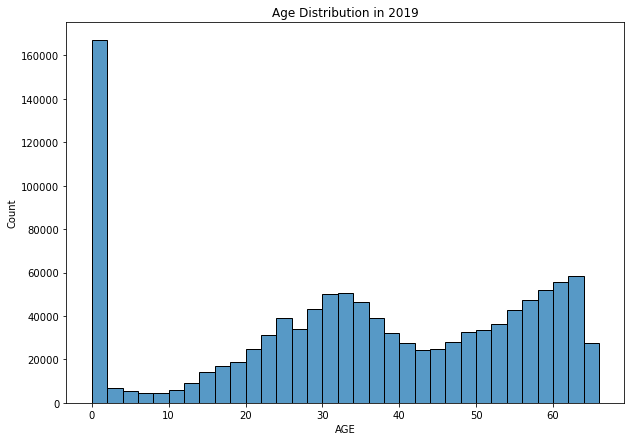

In [9]:
# 2019
plt.figure(figsize=(10, 7))
ax = sns.histplot(ccaei192_a['AGE'],binwidth=2)
ax.set_title('Age Distribution in 2019')

Text(0.5, 1.0, 'Age Distribution in 2020')

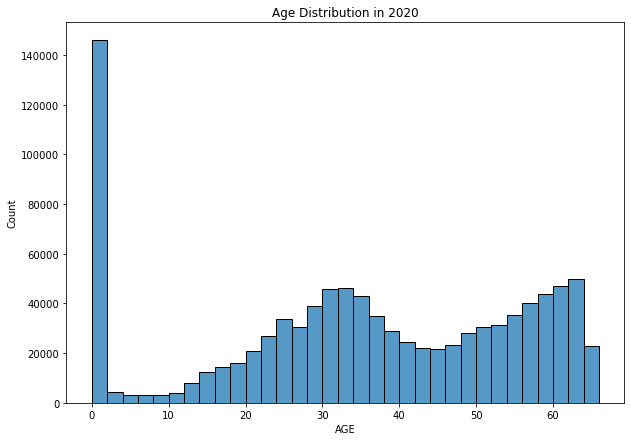

In [10]:
# 2020
plt.figure(figsize=(10, 7))
ax = sns.histplot(ccaei200_a['AGE'],binwidth=2)
ax.set_title('Age Distribution in 2020')

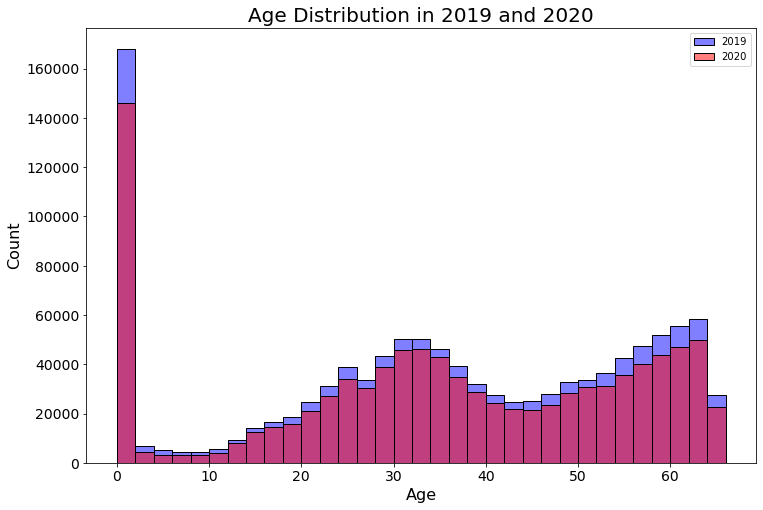

In [105]:
# create a combined dataframe with the age data
combined_df = pd.concat([ccaei192_a['AGE'], ccaei200_a['AGE']], axis=1, keys=['2019', '2020'])

# create a figure and axes object
fig, ax = plt.subplots(figsize=(12, 8))

# plot the histograms for 2019 and 2020
sns.histplot(data=combined_df, x='2019', binwidth=2, ax=ax, color='blue', alpha=0.5, label='2019')
sns.histplot(data=combined_df, x='2020', binwidth=2, ax=ax, color='red', alpha=0.5, label='2020')

# set the x and y-axis labels and title
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Age Distribution in 2019 and 2020', fontsize=20)

# set the tick label font size
ax.tick_params(axis='both', which='major', labelsize=14)

# add a legend to the plot
ax.legend()

# save the figure as a high-resolution PNG file
plt.savefig('age_distribution_2019_2020.png', dpi=300)

# show the plot
plt.show()

### Sex Distribution in 2019 and 2020

In [11]:
ccaei192_a['SEX'].unique()

array([2, 1], dtype=int64)

Text(0.5, 1.0, 'Sex Distribution in 2019')

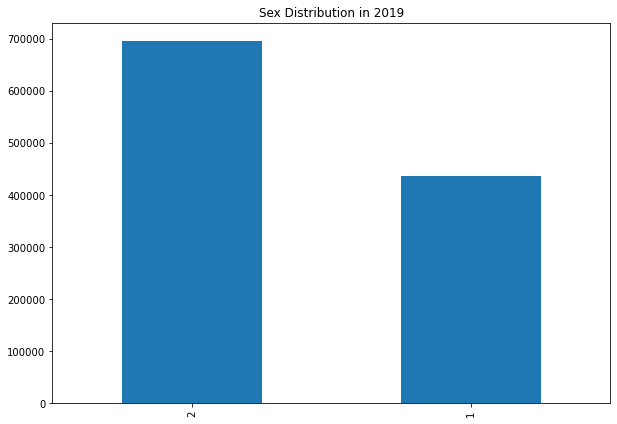

In [12]:
# 2019
plt.figure(figsize=(10, 7))
ax = ccaei192_a['SEX'].value_counts().plot.bar()
ax.set_title('Sex Distribution in 2019')

Text(0.5, 1.0, 'Sex Distribution in 2020')

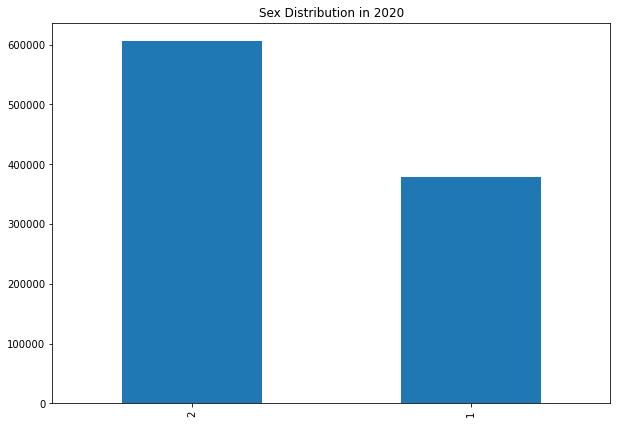

In [13]:
# 2020
plt.figure(figsize=(10, 7))
ax = ccaei200_a['SEX'].value_counts().plot.bar()
ax.set_title('Sex Distribution in 2020')

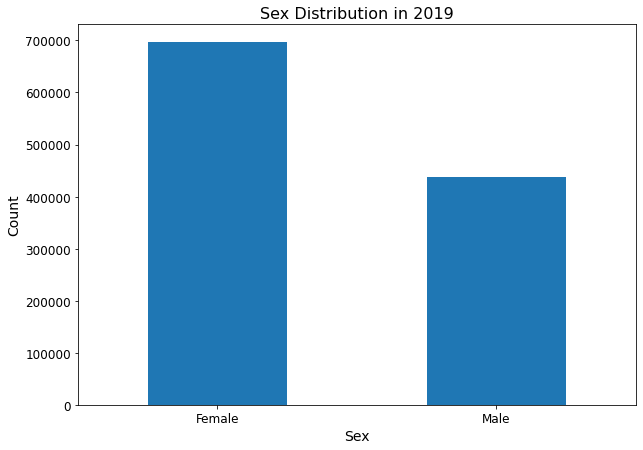

In [94]:
import matplotlib.pyplot as plt

# create a bar plot
plt.figure(figsize=(10, 7))
ax = ccaei192_a['SEX'].value_counts().plot.bar()

# set the x-labels and rotate them
ax.set_xticklabels(['Female', 'Male'], rotation=0)

# set the title
ax.set_title('Sex Distribution in 2019', fontsize=16)

# set the axis labels
ax.set_xlabel('Sex', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# set the tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

# show the plot
plt.show()


<Figure size 864x576 with 0 Axes>

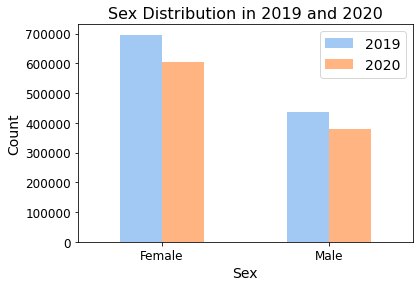

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# concatenate the two dataframes along the rows
combined_df = pd.concat([ccaei192_a['SEX'].value_counts(), ccaei200_a['SEX'].value_counts()], axis=1, keys=['2019', '2020'])

# create a pastel color palette
palette = sns.color_palette("pastel")

# create a bar plot of the combined dataframe with larger figure size
plt.figure(figsize=(12, 8))
ax = combined_df.plot(kind='bar', color=palette)

# set the x-labels
ax.set_xticklabels(['Female', 'Male'], rotation=0)

# set the title
ax.set_title('Sex Distribution in 2019 and 2020', fontsize=16)

# set the axis labels
ax.set_xlabel('Sex', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# set the tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

# save the plot as a PNG file
plt.savefig('sex_distribution.png', dpi=300, bbox_inches='tight')

# show the plot
plt.show()


### Density of Age VS. SEX 

C:\Users\nasri\anaconda3\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


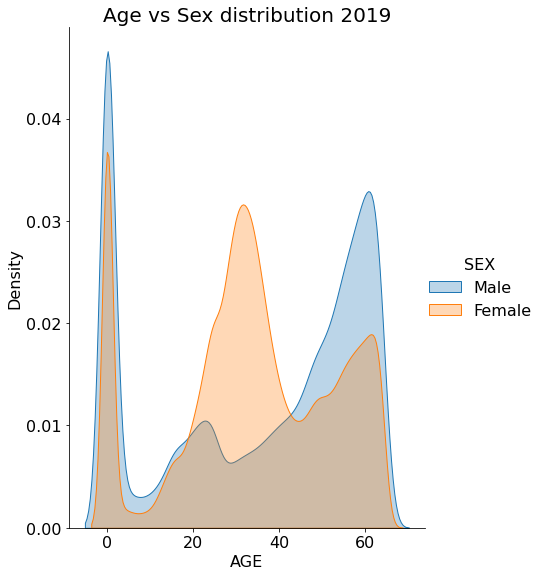

In [113]:
# 2019
plt.rcParams.update({'font.size': 16}) 

g = sns.FacetGrid(ccaei192_a, hue='SEX', height = 8, aspect=0.8)
g = g.map(sns.kdeplot, 'AGE', shade=True, alpha=0.3)
plt.title('Age vs Sex distribution 2019', fontsize=20) 
g.add_legend(fontsize=16, labels=['Male', 'Female'])


C:\Users\nasri\anaconda3\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


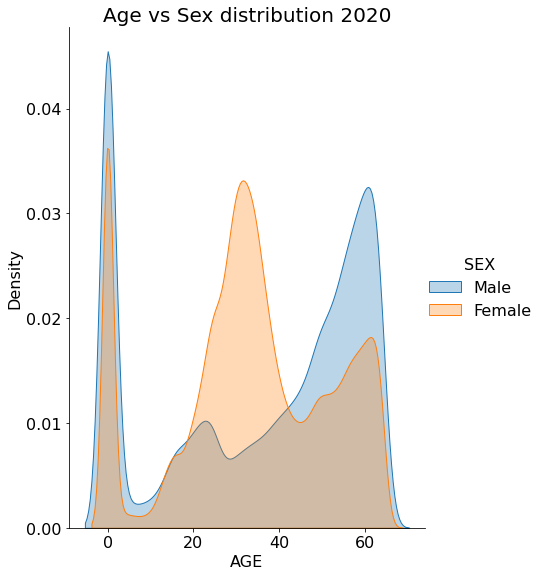

In [114]:
# 2020
g = sns.FacetGrid(ccaei200_a, hue='SEX', height = 8, aspect=0.8)
g = g.map(sns.kdeplot, 'AGE', shade=True, alpha=0.3)
plt.title('Age vs Sex distribution 2020', fontsize=20)
g.add_legend(fontsize=16, labels=['Male', 'Female'])

### Top 20 Most Doctor Visited Patients -- FROM THE MAIN DATA

Text(0.5, 1.0, 'Top 20 Most Doctor Visited Patients in 2019')

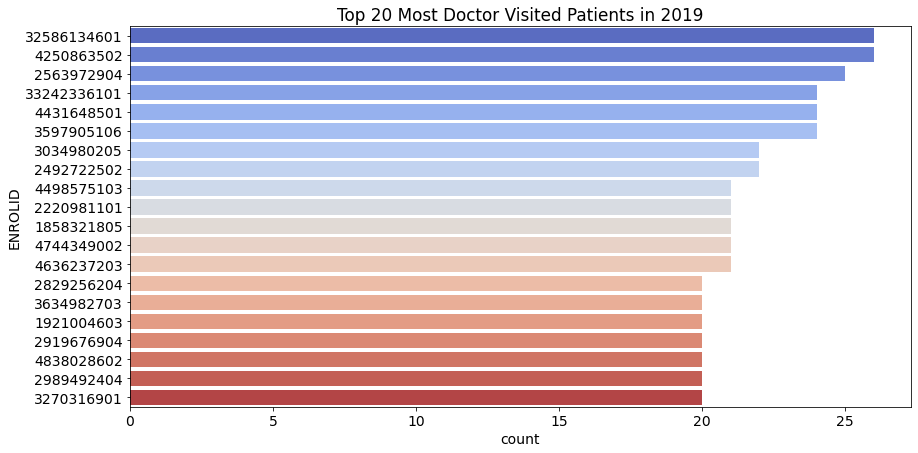

In [128]:
# in 2019
plt.figure(figsize=(14, 7))
sns.countplot(y=ccaei192_a['ENROLID'], order=ccaei192_a.ENROLID.value_counts().iloc[:20].index, 
              palette = 'coolwarm', data=ccaei192_a)
plt.title('Top 20 Most Doctor Visited Patients in 2019')

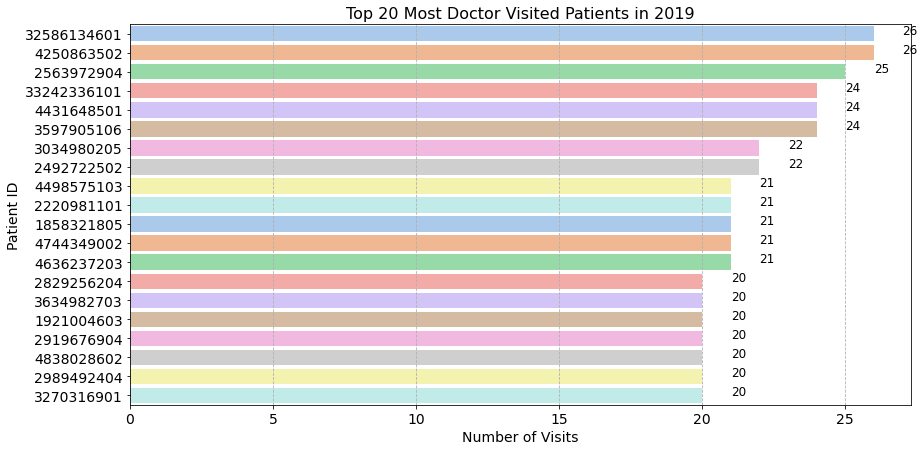

In [130]:
# Set the font size for the plot
plt.rcParams.update({'font.size': 14})

# Create the plot
plt.figure(figsize=(14, 7))
sns.countplot(y=ccaei192_a['ENROLID'], order=ccaei192_a.ENROLID.value_counts().iloc[:20].index, 
              palette='pastel', data=ccaei192_a)

# Add a title and axis labels
plt.title('Top 20 Most Doctor Visited Patients in 2019', fontsize=16)
plt.xlabel('Number of Visits', fontsize=14)
plt.ylabel('Patient ID', fontsize=14)

# Add annotations to the bars
for i, v in enumerate(ccaei192_a.ENROLID.value_counts().iloc[:20]):
    plt.text(v + 1, i, str(v), color='black', fontsize=12)

# Add a horizontal grid
plt.grid(axis='x', linestyle='--')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Top 20 Most Doctor Visited Patients in 2020')

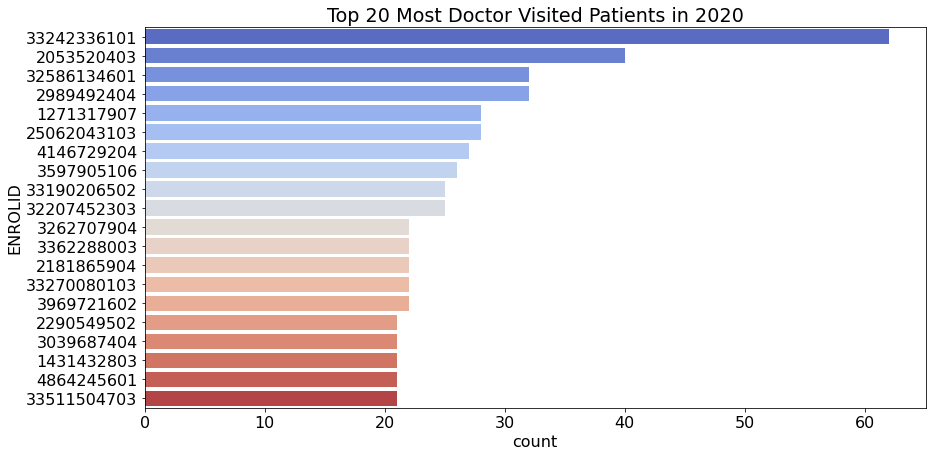

In [116]:
# in 2020
plt.figure(figsize=(14, 7))
sns.countplot(y=ccaei200_a['ENROLID'], order=ccaei200_a.ENROLID.value_counts().iloc[:20].index, 
              palette = 'coolwarm', data=ccaei200_a)
plt.title('Top 20 Most Doctor Visited Patients in 2020')

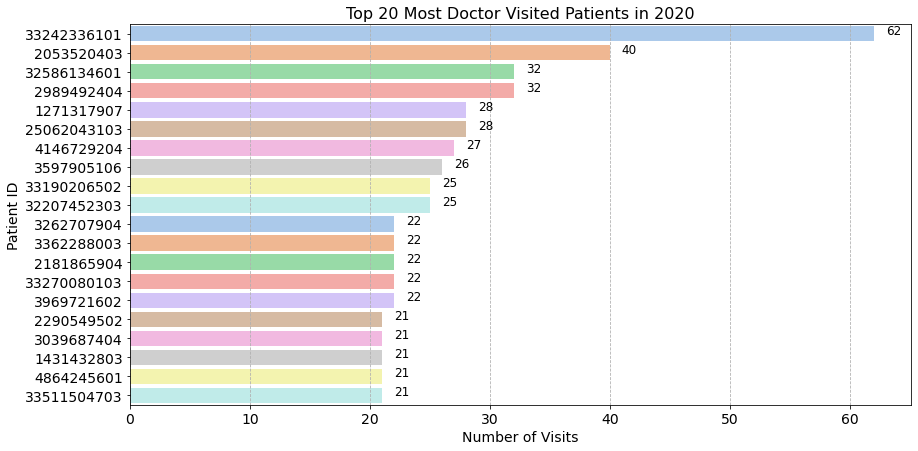

In [135]:
# Set the font size for the plot
plt.rcParams.update({'font.size': 14})

# Create the plot
plt.figure(figsize=(14, 7))
sns.countplot(y=ccaei200_a['ENROLID'], order=ccaei200_a.ENROLID.value_counts().iloc[:20].index, 
              palette='pastel', data=ccaei200_a)

# Add a title and axis labels
plt.title('Top 20 Most Doctor Visited Patients in 2020', fontsize=16)
plt.xlabel('Number of Visits', fontsize=14)
plt.ylabel('Patient ID', fontsize=14)

# Add annotations to the bars
for i, v in enumerate(ccaei200_a.ENROLID.value_counts().iloc[:20]):
    plt.text(v + 1, i, str(v), color='black', fontsize=12)

# Add a horizontal grid
plt.grid(axis='x', linestyle='--')

# Show the plot
plt.show()

# Data Cleansing

## Missing values

### 2019

In [18]:
ccaei192_a.isnull().sum()

ENROLID         0
YEAR            0
AGE             0
DX1            43
DX2         25429
DX3         66581
DX4        123325
DX5        191542
DX6        271969
DX7        356661
DX8        440696
DX9        520028
DX10       598945
DX11       671268
DX12       737521
DX13       796439
DX14       847469
DX15       890727
SEX             0
dtype: int64

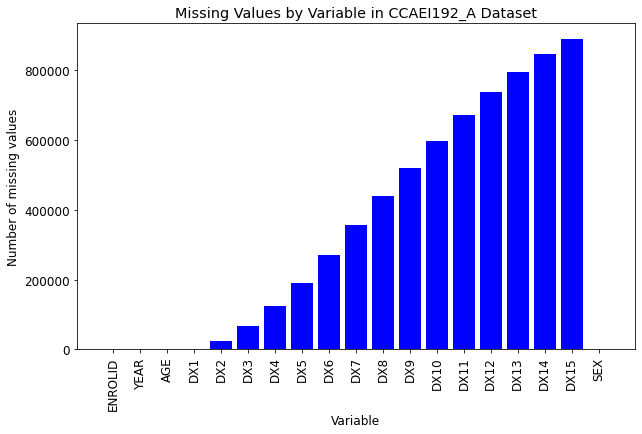

In [142]:
# Count the number of missing values for each variable
missing_counts = ccaei192_a.isnull().sum()

# Create a bar chart of missing values
plt.figure(figsize=(10, 6))
plt.bar(missing_counts.index, missing_counts.values, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Number of missing values')
plt.title('Missing Values by Variable in CCAEI192_A Dataset')
plt.show()


### Visualize the Null Value

<AxesSubplot:>

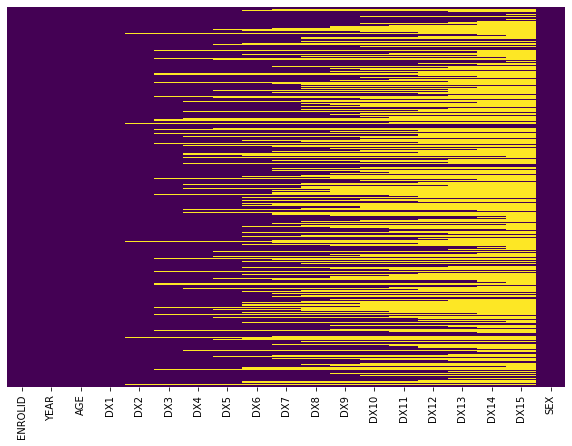

In [19]:
plt.figure(figsize = (10, 7))
sns.heatmap(ccaei192_a.isnull(), yticklabels=False, cbar = False, cmap='viridis')

### Fill Null Value with '999'

In [20]:
# fill with 999, a value that would not interfere with intepretation of disease codes. 
ccaei192_a = ccaei192_a.fillna('999')

### Visualize the null value again

<AxesSubplot:>

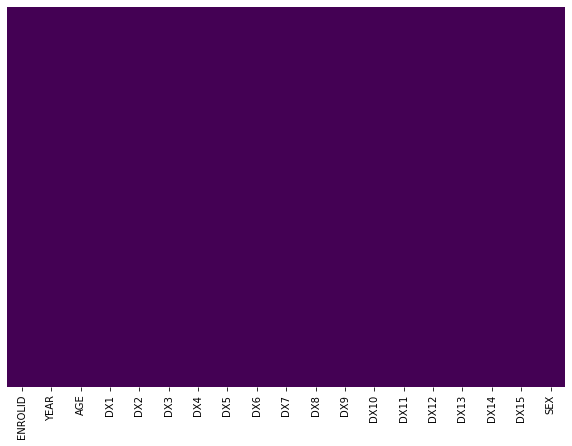

In [21]:
plt.figure(figsize = (10, 7))
sns.heatmap(ccaei192_a.isnull(), yticklabels=False, cbar = False, cmap='viridis')

### 2020

In [22]:
ccaei200_a.isnull().sum()

ENROLID         0
YEAR            0
AGE             0
DX1            19
DX2         21029
DX3         54219
DX4         98617
DX5        150809
DX6        210932
DX7        275383
DX8        341845
DX9        406283
DX10       473034
DX11       536211
DX12       595560
DX13       650176
DX14       698099
DX15       739661
SEX             0
dtype: int64

### Visualize the Null Value

<AxesSubplot:>

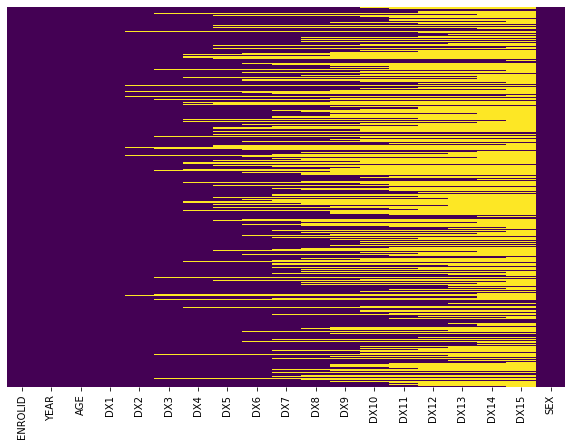

In [23]:
plt.figure(figsize = (10, 7))
sns.heatmap(ccaei200_a.isnull(), yticklabels=False, cbar = False, cmap='viridis')

### Fill Null Value with '999'

In [24]:
# fill with 999, a value that would not interfere with interpretation of disease codes. 
ccaei200_a = ccaei200_a.fillna('999')

### Visualize the null value again

<AxesSubplot:>

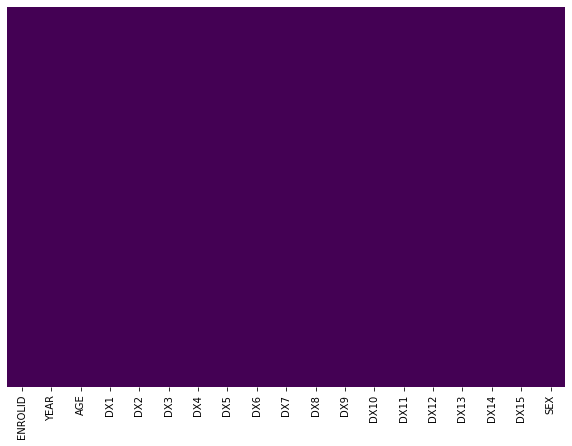

In [25]:
plt.figure(figsize = (10, 7))
sns.heatmap(ccaei200_a.isnull(), yticklabels=False, cbar = False, cmap='viridis')

## Disease Code Counting

https://pypi.org/project/icd10-cm/
#### creating two new dataframes with enrolid sex and age of respective year
#### and 22 disease categories count with initial vlaues as 0

In [26]:
# creating a new dataframe that contains the disease count of each patient

# new columns for disease counts
# disease_names = ['Infectious And Parastic Disease(A & B)',
#                  'Neoplasms(C)', 
#                  'Neoplasms Blood-forming Organs(D)', 
#                  'Endocrine Nutritional Metabolic(E)', 
#                  'Endocrine Nutritional Metabolic(E)', 
#                  'Nervous System(G)', 
#                  'Eye Adnexa, Ear and Mastoid(H)', 
#                  'Circulatory System(I)', 
#                  'Respiratory System(J)', 
#                  'Digestive System(K)', 
#                  'Skin and Connective Tissue(L)', 
#                  'musculoskeletal and Connective Tissue(M)', 
#                  'Genitourinary System(N)', 
#                  'Pregancy, Childbirth(O)', 
#                  'Conditions Originating in the Perinatal Period(P)', 
#                  'Congenital Malformations, Deformations(Q)', 
#                  'Symptoms, Signs, Lab Findings(R)', 
#                  'Injury, Poisoning(S, T)',
#                  'Emergency code additions(U)', 
#                  'External Causes of Morbidity(V, W, X, Y)', 
#                  'Factors Influencing Health Status (Z)']


# instead of the full names of disease categories, I am trying to use 'disease chapters' instead for easier counting. 
# see the chapters' reference here: https://pypi.org/project/icd10-cm/ 
disease_names = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 
                 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI',
                 'XVII', 'XVIII', 'XIX', 'XX', 'XXI', 'XXII'] 

# for 2019
df19_dx_count = ccaei192_a[['ENROLID', 'AGE', 'SEX']].copy()  # copy the only the columns with ID, Age, and Sex
df19_dx_count = df19_dx_count.reindex(columns= ['ENROLID', 'AGE', 'SEX'] + disease_names, fill_value=0) # add the diseases columns and 
                                                                                                        # fill with 0, this will be the 
                                                                                                        # counter for disease codes.
# for 2020
df20_dx_count = ccaei200_a[['ENROLID', 'AGE', 'SEX']].copy()
df20_dx_count = df20_dx_count.reindex(columns= ['ENROLID', 'AGE', 'SEX'] + disease_names, fill_value=0)

In [27]:
df19_dx_count.head()

,ENROLID,AGE,SEX,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII
0,286902,65,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,571103,57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,571103,57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,593902,52,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1038502,64,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
df20_dx_count.head()

,ENROLID,AGE,SEX,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII
0,371401,59,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,571103,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1092607,55,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1096002,64,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1096002,64,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
print(df19_dx_count.shape)
print(df20_dx_count.shape)

(1133288, 25)
(984798, 25)


### Dropping duplicate enroll ids

In [30]:
# Drop duplicate ENROLID
# dropping to have only each ID appearing once for each year, this will prevent too many cross-join. 

df19_dx_count = df19_dx_count.drop_duplicates('ENROLID', keep='last')  # keeping the last instance assuming that the higher age (if any) would be in the last record.
df20_dx_count = df20_dx_count.drop_duplicates('ENROLID', keep='last')

In [31]:
print(df19_dx_count.shape)
print(df20_dx_count.shape)

(924392, 25)
(812913, 25)


### merge two new dataframes with 0 as count in both

In [32]:
# join the two tables to find the ENROLIDs that appeared in both years
ccaei19_20 = pd.merge(df19_dx_count, df20_dx_count, 
                      on='ENROLID',  # merge on EnrolID to get the Ids that occurs in both years 
                      how='inner')   # inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.

In [33]:
ccaei19_20.head()

,ENROLID,AGE_x,SEX_x,I_x,II_x,III_x,IV_x,V_x,VI_x,VII_x,VIII_x,IX_x,X_x,XI_x,XII_x,XIII_x,XIV_x,XV_x,XVI_x,XVII_x,XVIII_x,XIX_x,XX_x,XXI_x,XXII_x,AGE_y,SEX_y,I_y,II_y,III_y,IV_y,V_y,VI_y,VII_y,VIII_y,IX_y,X_y,XI_y,XII_y,XIII_y,XIV_y,XV_y,XVI_y,XVII_y,XVIII_y,XIX_y,XX_y,XXI_y,XXII_y
0,571103,57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1092607,54,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2676601,50,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13452502,54,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13511703,58,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
print(ccaei19_20.shape)
# check amount of unique ENROLID
print(ccaei19_20['ENROLID'].nunique())

(76808, 49)
76808


In [35]:
### Gopi's suggestions
# table of patient diseases codes
# - column names - ENROLID, YEAR, AGE, codesList
# 571103, 2019, 57, [J189, G820, M8580, J923]
# One entry per patient/year
# Keep the highest Age

# 2019
# For every EnrollID
# get a list of indicees - then, combine the DX codes into a unique list 
# -- look at IDC-10, for each subgroup increement the count
# - ex - [J189, G820, M8580, J923] - [0,0,2,1,0,1,0]

# print(code.chapter)             # X
# print(code.block)
# X - J00-J99
# X - J829-J99

# chapterList - [x,y,z,x,a,b,c] 
# blockList - []



### Unique codes for 2019 using dictionaries

In [36]:
# as for suggestion from Gopi above
# I will collect unique codes using dictonary
code_dict_19 = {}
# creating dict with each unique enrolid as key
for i in ccaei19_20['ENROLID']:
    code_dict_19[i] = []
# length of dictionary is equal to unique enrolids in merged dataset
len(code_dict_19)

76808

In [37]:
# start collecting codes for 2019 -- this cell takes ~155 sec to run

# create a list of columns to iterate through when checking the codes
codes_col = ['DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6', 'DX7', 
             'DX8', 'DX9', 'DX10', 'DX11', 'DX12', 'DX13', 'DX14', 'DX15']

# for 2019 data
for index, row in ccaei192_a.iterrows():       # iterate through each row of the dataframe
    if row['ENROLID'] in ccaei19_20['ENROLID'].values:
        for dx in codes_col:
            if (row[dx] != 999) and (row[dx] not in code_dict_19[row['ENROLID']]):
                code_dict_19[row['ENROLID']].append(row[dx])

## example of icd10 package

In [38]:
# example of icd10 package
code = icd10.find("J189")
print(code.description)         # Acute bronchitis due to Mycoplasma pneumoniae
if code.billable:
    print(code, "is billable")  # J20.0 is billable

print(code.chapter)             # X
print(code.block)               # J00-J99
print(code.block_description)   # Diseases of the respiratory system

Pneumonia, unspecified organism
J18.9 is billable
X
J00-J99
Diseases of the respiratory system


In [39]:
type(code)

icd10.ICD10

In [40]:
# Here we start counting the icd-10-cm codes by iterating through the dictionary and increment the values in the count df

# first split the merged df back into two tables of 2019 and 2020


In [41]:
ccaei19_20.head()

,ENROLID,AGE_x,SEX_x,I_x,II_x,III_x,IV_x,V_x,VI_x,VII_x,VIII_x,IX_x,X_x,XI_x,XII_x,XIII_x,XIV_x,XV_x,XVI_x,XVII_x,XVIII_x,XIX_x,XX_x,XXI_x,XXII_x,AGE_y,SEX_y,I_y,II_y,III_y,IV_y,V_y,VI_y,VII_y,VIII_y,IX_y,X_y,XI_y,XII_y,XIII_y,XIV_y,XV_y,XVI_y,XVII_y,XVIII_y,XIX_y,XX_y,XXI_y,XXII_y
0,571103,57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1092607,54,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2676601,50,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13452502,54,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13511703,58,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### seperating two df's

In [42]:
# separate the merged dataframe back into df19 and df20
df19_dx_count = ccaei19_20[['ENROLID', 'AGE_x', 'SEX_x', 'I_x', 'II_x', 
                            'III_x', 'IV_x', 'V_x', 'VI_x', 'VII_x', 
                            'VIII_x', 'IX_x', 'X_x', 'XI_x', 'XII_x', 
                            'XIII_x', 'XIV_x', 'XV_x', 'XVI_x', 'XVII_x', 
                            'XVIII_x', 'XIX_x', 'XX_x', 'XXI_x', 'XXII_x']].copy()  

df20_dx_count = ccaei19_20[['ENROLID', 'AGE_y', 'SEX_y', 'I_y', 'II_y', 
                            'III_y', 'IV_y', 'V_y', 'VI_y', 'VII_y', 
                            'VIII_y', 'IX_y', 'X_y', 'XI_y', 'XII_y', 
                            'XIII_y', 'XIV_y', 'XV_y', 'XVI_y', 'XVII_y', 
                            'XVIII_y', 'XIX_y', 'XX_y', 'XXI_y', 'XXII_y']].copy() 

In [43]:
# change the column names back to original
df19_dx_count.columns = df19_dx_count.columns.str.replace('_x', '')
df20_dx_count.columns = df20_dx_count.columns.str.replace('_y', '')

In [44]:
print(df19_dx_count.head())
df20_dx_count.head()

    ENROLID  AGE  SEX  I  II  III  IV  V  VI  VII  VIII  IX  X  XI  XII  XIII  \
0    571103   57    1  0   0    0   0  0   0    0     0   0  0   0    0     0   
1   1092607   54    2  0   0    0   0  0   0    0     0   0  0   0    0     0   
2   2676601   50    2  0   0    0   0  0   0    0     0   0  0   0    0     0   
3  13452502   54    1  0   0    0   0  0   0    0     0   0  0   0    0     0   
4  13511703   58    2  0   0    0   0  0   0    0     0   0  0   0    0     0   

   XIV  XV  XVI  XVII  XVIII  XIX  XX  XXI  XXII  
0    0   0    0     0      0    0   0    0     0  
1    0   0    0     0      0    0   0    0     0  
2    0   0    0     0      0    0   0    0     0  
3    0   0    0     0      0    0   0    0     0  
4    0   0    0     0      0    0   0    0     0  


,ENROLID,AGE,SEX,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII
0,571103,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1092607,55,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2676601,51,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13452502,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13511703,59,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
print(df19_dx_count.shape)
print(df20_dx_count.shape)

(76808, 25)
(76808, 25)


### Delete merged df

In [46]:
# delete ccaei19_20 merged table to release memory
del ccaei19_20

## Count disease codes for 2019

In [47]:
# now we count the disease codes -- this cell takes ~850 sec

# for 2019
for i in df19_dx_count['ENROLID']:
    for j in code_dict_19[i]:
        code = icd10.find(j)                 # icd10.find('icd10-code') gets the icd10cm code information
        if type(code) is icd10.ICD10:        # checking if icd10.find() is of type icd10.ICD10, otherwise, 
                                             # it will be NoneType and produce error in .chapter
        # if isinstance(code, icd10.ICD10):  # commented out as an alternative to the above line
            try:
                df19_dx_count.loc[df19_dx_count['ENROLID'] == i, code.chapter]  += 1    # count/increment the chapter found in that row by 1
            except KeyError:                 # had to put exception to Key and Value Error, I am speculating that some ICD10 code might
                pass                         # be incorrect and giving these errors, but cannot find the exact cause yet. 
            except ValueError:
                pass

In [48]:
df19_dx_count.head()

,ENROLID,AGE,SEX,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII
0,571103,57,1,1,0,0,0,0,1,0,0,0,5,2,0,1,4,0,0,0,9,2,0,1,0
1,1092607,54,2,0,0,2,1,2,2,0,0,3,0,1,4,2,0,0,0,0,0,3,1,0,0
2,2676601,50,2,0,2,2,1,3,0,0,0,2,0,2,0,1,0,0,0,0,1,0,0,0,0
3,13452502,54,1,3,0,0,0,1,0,0,0,0,0,0,2,0,5,0,0,0,2,1,0,1,0
4,13511703,58,2,1,2,10,2,1,5,0,0,3,4,7,10,3,1,0,0,0,11,2,0,3,0


# merging 2019 with 2020

In [49]:
df19_dx_count = df19_dx_count[df19_dx_count['IX']==0]

In [50]:
print(df19_dx_count.head())
print(df19_dx_count.shape)
print(df19_dx_count['IX'].unique())

     ENROLID  AGE  SEX  I  II  III  IV  V  VI  VII  VIII  IX  X  XI  XII  \
0     571103   57    1  1   0    0   0  0   1    0     0   0  5   2    0   
3   13452502   54    1  3   0    0   0  1   0    0     0   0  0   0    2   
15  14357306   27    1  0   0    0   0  2   0    0     0   0  0   0    0   
27  14828304   16    2  0   0    0   0  0   3    0     0   0  0   0    0   
34  15194602   59    2  0   1    0   0  0   0    0     0   0  1   0    0   

    XIII  XIV  XV  XVI  XVII  XVIII  XIX  XX  XXI  XXII  
0      1    4   0    0     0      9    2   0    1     0  
3      0    5   0    0     0      2    1   0    1     0  
15     0    0   0    0     0      0    0   0    0     0  
27     1    2   0    0     1      3    2   0    2     0  
34     0    0   0    0     0      1    0   0    7     0  
(37901, 25)
[0]


In [51]:
df20_dx_count.head()

,ENROLID,AGE,SEX,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII
0,571103,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1092607,55,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2676601,51,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13452502,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13511703,59,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Merging 2019 disease count table with 2020 initial 0 disease count table

In [52]:
# join the two tables to find the ENROLIDs that appeared in both years
ccaei19_20 = pd.merge(df19_dx_count, df20_dx_count, 
                      on='ENROLID',  # merge on EnrolID to get the Ids that occurs in both years 
                      how='inner')   # inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.

In [53]:
ccaei19_20.head()

,ENROLID,AGE_x,SEX_x,I_x,II_x,III_x,IV_x,V_x,VI_x,VII_x,VIII_x,IX_x,X_x,XI_x,XII_x,XIII_x,XIV_x,XV_x,XVI_x,XVII_x,XVIII_x,XIX_x,XX_x,XXI_x,XXII_x,AGE_y,SEX_y,I_y,II_y,III_y,IV_y,V_y,VI_y,VII_y,VIII_y,IX_y,X_y,XI_y,XII_y,XIII_y,XIV_y,XV_y,XVI_y,XVII_y,XVIII_y,XIX_y,XX_y,XXI_y,XXII_y
0,571103,57,1,1,0,0,0,0,1,0,0,0,5,2,0,1,4,0,0,0,9,2,0,1,0,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13452502,54,1,3,0,0,0,1,0,0,0,0,0,0,2,0,5,0,0,0,2,1,0,1,0,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,14357306,27,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14828304,16,2,0,0,0,0,0,3,0,0,0,0,0,0,1,2,0,0,1,3,2,0,2,0,16,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15194602,59,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,7,0,60,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
ccaei19_20.shape

(37901, 49)

In [55]:
ccaei19_20['ENROLID'].nunique()

37901

In [56]:
# as for suggestion from Gopi above
# I will collect unique codes using dictonary
code_dict_20 = {}
for i in ccaei19_20['ENROLID']:
    code_dict_20[i] = []

In [57]:
len(code_dict_20)

37901

In [58]:
# start collecting codes for 2020 -- this cell takes ~107 sec to run

# create a list of columns to iterate through when checking the codes
codes_col = ['DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6', 'DX7', 
             'DX8', 'DX9', 'DX10', 'DX11', 'DX12', 'DX13', 'DX14', 'DX15']

# for 2020 data
for index, row in ccaei200_a.iterrows():       # iterate through each row of the dataframe
    if row['ENROLID'] in ccaei19_20['ENROLID'].values:
        for dx in codes_col:
            if (row[dx] != 999) and (row[dx] not in code_dict_20[row['ENROLID']]):
                code_dict_20[row['ENROLID']].append(row[dx])

In [59]:
ccaei19_20.head()

,ENROLID,AGE_x,SEX_x,I_x,II_x,III_x,IV_x,V_x,VI_x,VII_x,VIII_x,IX_x,X_x,XI_x,XII_x,XIII_x,XIV_x,XV_x,XVI_x,XVII_x,XVIII_x,XIX_x,XX_x,XXI_x,XXII_x,AGE_y,SEX_y,I_y,II_y,III_y,IV_y,V_y,VI_y,VII_y,VIII_y,IX_y,X_y,XI_y,XII_y,XIII_y,XIV_y,XV_y,XVI_y,XVII_y,XVIII_y,XIX_y,XX_y,XXI_y,XXII_y
0,571103,57,1,1,0,0,0,0,1,0,0,0,5,2,0,1,4,0,0,0,9,2,0,1,0,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13452502,54,1,3,0,0,0,1,0,0,0,0,0,0,2,0,5,0,0,0,2,1,0,1,0,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,14357306,27,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14828304,16,2,0,0,0,0,0,3,0,0,0,0,0,0,1,2,0,0,1,3,2,0,2,0,16,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15194602,59,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,7,0,60,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Seperating two df's

In [60]:
df19_dx_count = ccaei19_20[['ENROLID', 'AGE_x', 'SEX_x', 'I_x', 'II_x', 
                            'III_x', 'IV_x', 'V_x', 'VI_x', 'VII_x', 
                            'VIII_x', 'IX_x', 'X_x', 'XI_x', 'XII_x', 
                            'XIII_x', 'XIV_x', 'XV_x', 'XVI_x', 'XVII_x', 
                            'XVIII_x', 'XIX_x', 'XX_x', 'XXI_x', 'XXII_x']].copy()  

df20_dx_count = ccaei19_20[['ENROLID', 'AGE_y', 'SEX_y', 'I_y', 'II_y', 
                            'III_y', 'IV_y', 'V_y', 'VI_y', 'VII_y', 
                            'VIII_y', 'IX_y', 'X_y', 'XI_y', 'XII_y', 
                            'XIII_y', 'XIV_y', 'XV_y', 'XVI_y', 'XVII_y', 
                            'XVIII_y', 'XIX_y', 'XX_y', 'XXI_y', 'XXII_y']].copy()

In [61]:
df19_dx_count.columns = df19_dx_count.columns.str.replace('_x', '')
df20_dx_count.columns = df20_dx_count.columns.str.replace('_y', '')

In [62]:
df20_dx_count.head()
df19_dx_count.head()

,ENROLID,AGE,SEX,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII
0,571103,57,1,1,0,0,0,0,1,0,0,0,5,2,0,1,4,0,0,0,9,2,0,1,0
1,13452502,54,1,3,0,0,0,1,0,0,0,0,0,0,2,0,5,0,0,0,2,1,0,1,0
2,14357306,27,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14828304,16,2,0,0,0,0,0,3,0,0,0,0,0,0,1,2,0,0,1,3,2,0,2,0
4,15194602,59,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,7,0


In [63]:
# delete ccaei19_20 merged table to release memory
del ccaei19_20

## Count disease codes for 2020

In [64]:
# for 2020
for i in df20_dx_count['ENROLID']:
    for j in code_dict_20[i]:
        code = icd10.find(j)                 # icd10.find('icd10-code') gets the icd10cm code information
        if type(code) is icd10.ICD10:        # checking if icd10.find() is of type icd10.ICD10, otherwise, 
                                             # it will be NoneType and produce error in .chapter
        # if isinstance(code, icd10.ICD10):  # commented out as an alternative to the above line
            try:
                df20_dx_count.loc[df20_dx_count['ENROLID'] == i, code.chapter]  += 1    # count/increment the chapter found in that row by 1
            except KeyError:                 # had to put exception to Key and Value Error, I am speculating that some ICD10 code might
                pass                         # be incorrect and giving these errors, but cannot find the exact cause yet. 
            except ValueError:
                pass

In [65]:
df20_dx_count.head()

,ENROLID,AGE,SEX,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII
0,571103,58,1,0,1,3,0,0,1,0,0,1,0,3,0,0,1,0,0,0,2,0,0,3,0
1,13452502,55,1,2,0,2,1,1,0,0,0,0,0,0,1,1,6,0,0,0,3,1,0,2,0
2,14357306,28,1,0,0,0,0,11,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,14828304,16,2,1,0,0,0,0,3,0,0,0,0,0,1,1,2,0,0,1,2,2,0,2,0
4,15194602,60,2,1,0,2,0,2,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0


In [66]:
df20_dx_count.head()
print(df20_dx_count['IX'].unique())

[ 1  0  4  2  3  7  5  9  6  8 12 10 11 17 16 14 26 19 15 13]


In [67]:
#sns.histplot(x = 'IX', binwidth= 1, stat = 'probability', data = df19_dx_count)

### Diagnosis Distribution

In [68]:
col_names = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 
                 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI',
                 'XVII', 'XVIII', 'XIX', 'XX', 'XXI', 'XXII'] 


cat_colors = ['RdBu_r','coolwarm','vlag', 'autumn_r',
              'RdBu',  'icefire_r','Set2', 'viridis_r', 
              'summer','nipy_spectral','viridis', 'rocket' ]

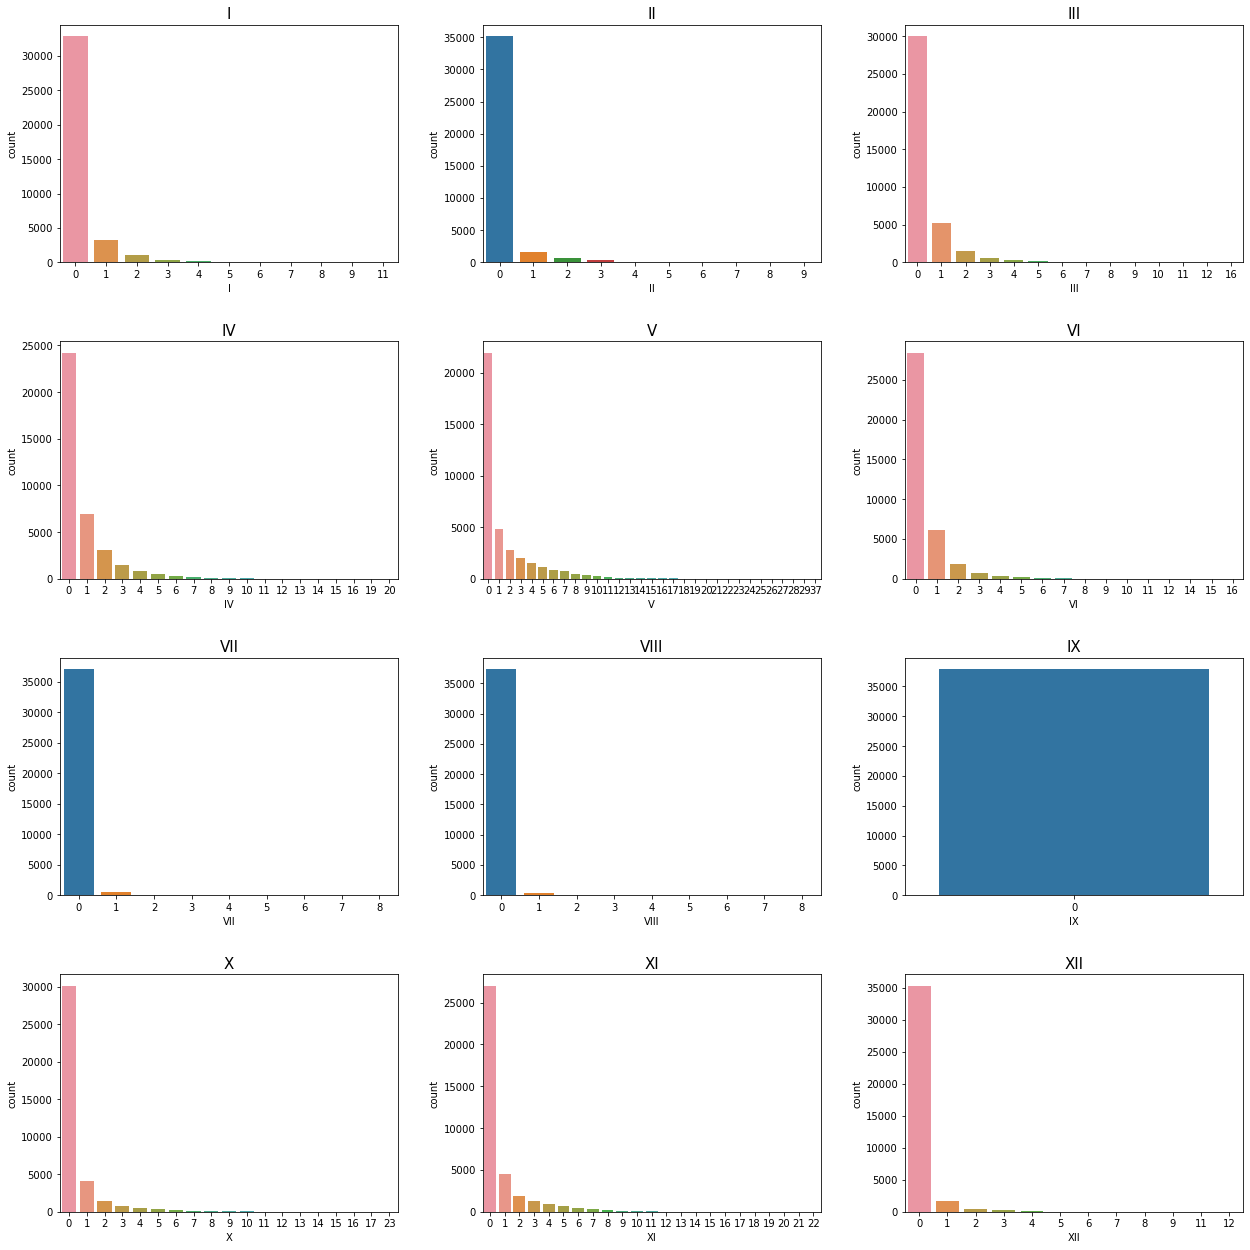

In [69]:
fig, axes = plt.subplots(4,3, figsize=(18,18))
position = 0

for row in range(4):
    for col in range(3):
        
        axes[row, col].set_title(col_names[position],fontdict={'fontsize': 15})
        
        sns.countplot(x=col_names[position],
                      #palette = cat_colors[position], 
                      #edgecolor = sns.color_palette(cat_colors[position], 4),
                      linewidth=1,
                      ax = axes[row,col],
                      data=df19_dx_count)
        
     
        
        position+= 1
        
plt.subplots_adjust(hspace=0.9)
plt.tight_layout(pad=3);

### Correlation

In [70]:
# plt.figure(figsize=(15, 8))
# # df19_dx_count.corr()['IX'][:-1].sort_values().plot(kind='bar')
# df19_dx_count.corr()['IX'].sort_values().plot(kind='bar')

<AxesSubplot:>

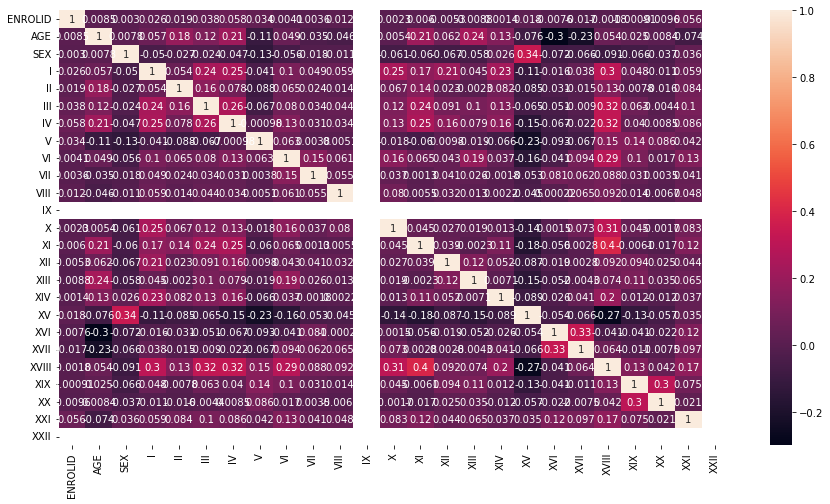

In [71]:
plt.figure(figsize=(15, 8))
sns.heatmap(df19_dx_count.corr(), annot=True)

In [72]:
#print(df19_dx_count.corr()['IX'].abs().sort_values())

In [73]:
df19_dx_count['XXII'].unique()

array([0], dtype=int64)

## creating Class label

In [74]:
# # 2019
# df19_dx_count = df19_dx_count.assign(LABEL = df19_dx_count['IX'].apply(lambda x: 1 if x > 0  else 0))

In [75]:
# df19_dx_count.head()

In [76]:
df19_dx_count.drop('IX',axis = 1,inplace = True)

In [77]:
df19_dx_count.head()

,ENROLID,AGE,SEX,I,II,III,IV,V,VI,VII,VIII,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII
0,571103,57,1,1,0,0,0,0,1,0,0,5,2,0,1,4,0,0,0,9,2,0,1,0
1,13452502,54,1,3,0,0,0,1,0,0,0,0,0,2,0,5,0,0,0,2,1,0,1,0
2,14357306,27,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14828304,16,2,0,0,0,0,0,3,0,0,0,0,0,1,2,0,0,1,3,2,0,2,0
4,15194602,59,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,7,0


In [78]:
# 2020
df20_dx_count = df20_dx_count.assign(LABEL = df20_dx_count['IX'].apply(lambda x: 1 if x > 0  else 0))

In [79]:
df20_dx_count.head()

,ENROLID,AGE,SEX,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,LABEL
0,571103,58,1,0,1,3,0,0,1,0,0,1,0,3,0,0,1,0,0,0,2,0,0,3,0,1
1,13452502,55,1,2,0,2,1,1,0,0,0,0,0,0,1,1,6,0,0,0,3,1,0,2,0,0
2,14357306,28,1,0,0,0,0,11,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
3,14828304,16,2,1,0,0,0,0,3,0,0,0,0,0,1,1,2,0,0,1,2,2,0,2,0,0
4,15194602,60,2,1,0,2,0,2,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,0


In [80]:
# join the two tables to find the ENROLIDs that appeared in both years
df19_20 = pd.concat([df19_dx_count,df20_dx_count[['LABEL']]],axis = 1)   # inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.

In [81]:
df19_20.head()

,ENROLID,AGE,SEX,I,II,III,IV,V,VI,VII,VIII,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,LABEL
0,571103,57,1,1,0,0,0,0,1,0,0,5,2,0,1,4,0,0,0,9,2,0,1,0,1
1,13452502,54,1,3,0,0,0,1,0,0,0,0,0,2,0,5,0,0,0,2,1,0,1,0,0
2,14357306,27,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,14828304,16,2,0,0,0,0,0,3,0,0,0,0,0,1,2,0,0,1,3,2,0,2,0,0
4,15194602,59,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,7,0,0


In [82]:
# del df19_dx_count
# del df20_dx_count

### Class label frequency

Text(0.5, 1.0, 'Class Distribution')

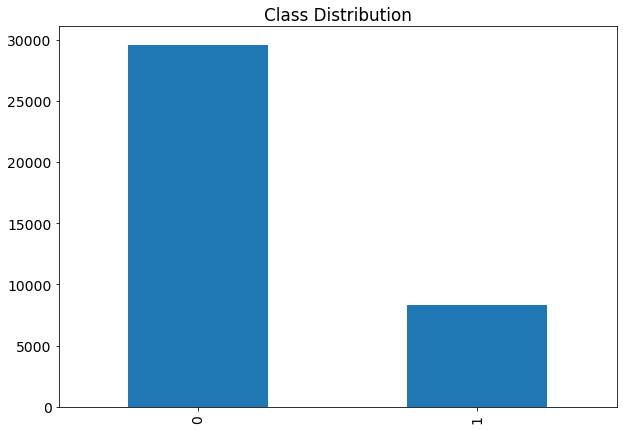

In [146]:
# Set the font size for the plot
plt.rcParams.update({'font.size': 14})

# 2019 and 2020 combined
plt.figure(figsize=(10, 7))
ax = df19_20['LABEL'].value_counts().plot.bar()
ax.set_title('Class Distribution')

In [144]:
# # 2020
# plt.figure(figsize=(10, 7))
# ax = df20_dx_count['LABEL'].value_counts().plot.bar()
# ax.set_title('Class Distribution in 2020')

# Saving dataset to csv

In [85]:
df19_20.to_csv(r'df19_20.csv',index = False, header = True)
#df19_20.loc[0:20000].to_csv('df19_20.csv')

In [86]:
check = pd.read_csv('df19_20.csv')
check.head()

,ENROLID,AGE,SEX,I,II,III,IV,V,VI,VII,VIII,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,LABEL
0,571103,57,1,1,0,0,0,0,1,0,0,5,2,0,1,4,0,0,0,9,2,0,1,0,1
1,13452502,54,1,3,0,0,0,1,0,0,0,0,0,2,0,5,0,0,0,2,1,0,1,0,0
2,14357306,27,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,14828304,16,2,0,0,0,0,0,3,0,0,0,0,0,1,2,0,0,1,3,2,0,2,0,0
4,15194602,59,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,7,0,0


In [87]:
del check

### How many people developed cardiac disease from year 2019 to 2020? 

In [88]:
# side by side comparison